## Tải thư viện cần thiết.

In [21]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\__main__.py", line 29, in <module>
    from pip._internal.cli.main import main as _main
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\cmdoptions.py", line 23, i

## Thông tin sơ lược.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Đọc file csv sau khi lưu, bao gồm 100 post.
raw_df = pd.read_csv('Data/hotwheels.csv')
len(raw_df)

100

In [24]:
# Thông tin về dữ liệu của dataframe.
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        100 non-null    int64  
 1   text                           100 non-null    object 
 2   post_text                      67 non-null     object 
 3   shared_text                    33 non-null     object 
 4   original_text                  0 non-null      float64
 5   time                           100 non-null    object 
 6   timestamp                      100 non-null    int64  
 7   image                          25 non-null     object 
 8   image_lowquality               100 non-null    object 
 9   images                         100 non-null    object 
 10  images_description             100 non-null    object 
 11  images_lowquality              100 non-null    object 
 12  images_lowquality_description  100 non-null    obje

In [25]:
# Lượt tương tác (reactions, comments và shares) của bài viết gần nhất.
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

Text(0, 0.5, 'total')

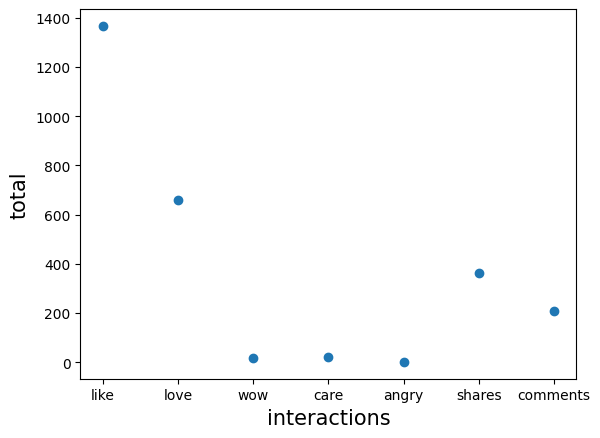

In [49]:
x = reactions.keys()
y = reactions.values()
plt.scatter(x,y)
plt.xlabel("interactions", fontsize = 15)
plt.ylabel("total", fontsize = 15)

Tương tác của bài viết đầu tiên chủ yếu là "like" và "love"

In [27]:
# Số reactions của mỗi bài viết.
y = raw_df[['post_id', 'text', 'reactions', 'reaction_count']]
y

,post_id,text,reactions,reaction_count
0,663497495969085,Only ten cars remain but only one car will take the crown!\r\n\r\nTune in this SATURDAY at 9am PST and see which car will be immortalized into a HotWheels die-cast.,"{'like': 1367, 'love': 661, 'wow': 15, 'care': 21, 'angry': 1}",2065
1,662533809398787,"Challengers, let’s race full speed ahead this 11 Nov! ENJOY UP TO 70% OFF with Shopee 11.11 Big Sale & Lazada’s 11.11 Biggest Sale of The Year!\r\n\r\n🗓️ BEST DEALS ONLY on 11.11 🗓️\r\n🤩 UP TO 70% OFF\r\n🤩 Shopee : EXTRA UP TO $26 OFF Voucher*\r\n🤩 Lazada : EXTRA UP TO $22 OFF Voucher*\r\n*T&Cs apply.\r\n\r\n💡🎁GIFT-WITH-PURCHASE AWAITS EACH STORE💡\r\n🧡Shopee: FREE 1x Thomas Storage Box with min. purchase of $60 & above on any products.\r\n💙Lazada: FREE 1x Hot Wheels Limited Edition Drawstring Bag with min. purchase of $40 & above on any products.\r\n\r\n🚗🏎️💨 Shop & build tracks, zoom, flip, stunt, crash… all the way with Hot Wheels City, Monster Trucks, and more!🔥\r\n\r\n🎁Don't miss out, add-to-cart the most exciting 11.11 deals now while stocks last!⏰\r\n\r\nSHOP NOW at\r\n🧡https://bit.ly/MattelStore_ShopeeSG\r\n💙https://bit.ly/MattelStore_LazadaSG\r\n\r\n#ShopeeSG #Shopee1111BigSale #Lazada1111 #LazadaSG #MattelSG",{'like': 9},9
2,662301126088722,Tune in this Saturday for the Hot Wheels Legends Tour Global Grand Finale and see which car will be chosen to be immortalized into a Hot Wheels 1:64 scale die-cast.\r\n\r\nStreaming live 11.11.2023 at 9am PST on Hot Wheels social channels and MattelCreations.com.,"{'like': 219, 'love': 58, 'wow': 1, 'care': 4}",282
3,661756316143203,"This Saturday marks the sixth Hot Wheels Legends Tour Global Finale.\r\n\r\nBefore we crown a new winner, let’s open up the vault and take a look back at all of our previous winners. 🏆","{'like': 1133, 'love': 496, 'haha': 1, 'wow': 14, 'care': 26}",1670
4,1276112246404579,"Join us for the Semi-Finals of the Hot Wheels Legends Tour! Watch LIVE judging from a panel of celebrities and top motorsport athletes, including Coco Zurita, Aimee Shackelford, and Eric Kendricks\r\nThe Hot Wheels Legends Tour, now in its sixth year, is a global search for the next fan-made custom car to be made into a Hot Wheels die-cast.\r\n\r\nThe Hot Wheels Legends Tour is made possible in partnership with Walmart and Presenting Sponsor, Mobil 1.\r\nLearn more about the Hot Wheels Legends Tour at www.hotwheels.com/legends","{'like': 249, 'love': 81, 'haha': 1, 'wow': 2, 'care': 1, 'sad': 1}",335
...,...,...,...,...
95,130770646693712,"SUN, SEP 11\r\nHot Wheels Monster Trucks Live!",NaN,19
96,998235587977759,"SUN, SEP 4\r\nHot Wheels Monster Trucks Live!",NaN,20
97,300656448999300,"SUN, SEP 4\r\nHot Wheels Monster Trucks Live!",NaN,32
98,600244618961040,"Join Hot Wheels, NBC, Rutledge Wood and Dalal Elsheikh tonight at 10PM ET on Threads to live-thread all things Hot Wheels: Ultimate Challenge.",NaN,1000


## =====================================================================================================

## Bài viết có số reactions lớn nhất và bé nhất.

In [28]:
# Bài viết có số reactions lớn nhất của trong 100 bài crawl về - 9500 reactions.

highest_reaction_count = max(raw_df['reaction_count'])
post1 = raw_df[raw_df['reaction_count'] == highest_reaction_count]
post1[['post_id', 'post_text', 'time', 'reaction_count', 'was_live', 'video_id']]

,post_id,post_text,time,reaction_count,was_live,video_id
45,636367022015466,"Phoenix's creative garage spirit shines! 🏁🔥 Check out some of the best custom cars and moments from today, where passion met creativity in the desert sun! ☀️🚗 #HotWheelsLegends",2023-09-23 23:30:25,9500,False,3.396527e+14


In [29]:
# Bài viết có số reactions thấp nhất trong 100 bài crawl về - 9 reactions.

lowest_reaction_count = min(raw_df['reaction_count'])
post2 = raw_df[raw_df['reaction_count'] == lowest_reaction_count]
post2[['post_id', 'post_text', 'time', 'reaction_count', 'was_live']]

,post_id,post_text,time,reaction_count,was_live
1,662533809398787,"Challengers, let’s race full speed ahead this 11 Nov! ENJOY UP TO 70% OFF with Shopee 11.11 Big Sale & Lazada’s 11.11 Biggest Sale of The Year!\r\n\r\n🗓️ BEST DEALS ONLY on 11.11 🗓️\r\n🤩 UP TO 70% OFF\r\n🤩 Shopee : EXTRA UP TO $26 OFF Voucher*\r\n🤩 Lazada : EXTRA UP TO $22 OFF Voucher*\r\n*T&Cs apply.\r\n\r\n💡🎁GIFT-WITH-PURCHASE AWAITS EACH STORE💡\r\n🧡Shopee: FREE 1x Thomas Storage Box with min. purchase of $60 & above on any products.\r\n💙Lazada: FREE 1x Hot Wheels Limited Edition Drawstring Bag with min. purchase of $40 & above on any products.\r\n\r\n🚗🏎️💨 Shop & build tracks, zoom, flip, stunt, crash… all the way with Hot Wheels City, Monster Trucks, and more!🔥\r\n\r\n🎁Don't miss out, add-to-cart the most exciting 11.11 deals now while stocks last!⏰\r\n\r\nSHOP NOW at\r\n🧡https://bit.ly/MattelStore_ShopeeSG\r\n💙https://bit.ly/MattelStore_LazadaSG\r\n\r\n#ShopeeSG #Shopee1111BigSale #Lazada1111 #LazadaSG #MattelSG",2023-11-08 06:00:47,9,False


In [30]:
# Số reactions trung bình của 100 bài.

average_reaction_count = raw_df['reaction_count'].mean()
average_reaction_count

707.65

In [31]:
# Thời gian của hai bài đăng trên.

print(post1['time']) 
print(post2['time'])


45    2023-09-23 23:30:25
Name: time, dtype: object
1    2023-11-08 06:00:47
Name: time, dtype: object


Như ta có thể thấy trong 3 cells ở trên, có sự khác biệt rất lớn giữa số reactions lớn nhất, nhỏ nhất và bình quân. Ta thấy rằng sự tương tác không đồng đều, có thể kết luận một phần là do thị hiếu người dùng, xu hướng tương tác, và do thời gian đăng bài. 

Tính theo múi giờ VN, bài nhiều reations nhất được đăng lúc 23h30 tối, quy đổi ra múi giờ bình quân bên Mĩ là 11h30 trưa - là ban ngày và giờ nghỉ trưa nên nhiều người sẽ thấy được bài viết. Ngược lại, bài viết ít reactions nhất được đăng lúc 6h00 phút sáng, tức là khoảng 6h00 tối bên Mĩ - là thời gian mọi thứ trở nên bận bịu hơn (tan làm, nấu bữa tối, trông con, đón con, tham gia giao thông,...) nên số reactions sẽ giảm mạnh. 


Ta cùng xem kĩ hơn về nội dung bài post:

In [32]:
# Lấy ra nội dung bài đăng nhiều reactions nhất.

content1 = post1['post_text']
pd.set_option('display.max_colwidth', None)
content1

45    Phoenix's creative garage spirit shines! 🏁🔥 Check out some of the best custom cars and moments from today, where passion met creativity in the desert sun! ☀️🚗 #HotWheelsLegends
Name: post_text, dtype: object

In [33]:
# Lấy ra nội dung bài đăng ít reactions nhất.

content2 = post2['post_text']
pd.set_option('display.max_colwidth', None)
content2

1    Challengers, let’s race full speed ahead this 11 Nov! ENJOY UP TO 70% OFF with Shopee 11.11 Big Sale & Lazada’s 11.11 Biggest Sale of The Year!\r\n\r\n🗓️ BEST DEALS ONLY on 11.11 🗓️\r\n🤩 UP TO 70% OFF\r\n🤩 Shopee : EXTRA UP TO $26 OFF Voucher*\r\n🤩 Lazada : EXTRA UP TO $22 OFF Voucher*\r\n*T&Cs apply.\r\n\r\n💡🎁GIFT-WITH-PURCHASE AWAITS EACH STORE💡\r\n🧡Shopee: FREE 1x Thomas Storage Box with min. purchase of $60 & above on any products.\r\n💙Lazada: FREE 1x Hot Wheels Limited Edition Drawstring Bag with min. purchase of $40 & above on any products.\r\n\r\n🚗🏎️💨 Shop & build tracks, zoom, flip, stunt, crash… all the way with Hot Wheels City, Monster Trucks, and more!🔥\r\n\r\n🎁Don't miss out, add-to-cart the most exciting 11.11 deals now while stocks last!⏰\r\n\r\nSHOP NOW at\r\n🧡https://bit.ly/MattelStore_ShopeeSG\r\n💙https://bit.ly/MattelStore_LazadaSG\r\n\r\n#ShopeeSG #Shopee1111BigSale #Lazada1111 #LazadaSG #MattelSG
Name: post_text, dtype: object

(Lập luận này chỉ dựa trên suy luận, phân tích và ý kiến cá nhân).

Post có nhiều reactions nhất là một video recap lại sự kiện độ xe quy mô toàn cầu (Hotwheels Legends Tour), được tổ chức bởi công ty Mattel, nhằm chọn ra những mẫu mã được yêu thích nhất để làm thành mô hình tỷ lệ 1:64. Video được đầu tư chỉn chu và bao gồm nhiều chiếc xe đẹp, góp phần đẩy mạnh tương tác. Hơn nữa, đồ chơi Mattel được yêu thích toàn cầu. Vì lý do đó, để lại reactions cũng là một cách để người theo dõi từ xa bày tỏ sự yêu thích tới những chiếc xe và sự kiện.

Trong khi đó, post ít reations nhất lại là một tin quảng bá ngày sale, khuyến mại trên Shopee và Lazada. Thông thường bài viết này chỉ được đăng với mục đích thông tin, chứ không phải để thu tương tác nên không được đầu tư quá kĩ lưỡng. Vì vậy, có ít reactions là điều có thể suy ra được.

## =====================================================================================================================================================

## Sự biến động của lượng reactions theo dòng thời gian.

In [57]:
# Lấy ra dataframe check gồm 3 cột time, timestamp và reaction_count để thống kê, và đảo lại dataframe do check được xếp từ thời điểm gần nhất tới xa nhất (để khi vẽ biểu đồ sẽ thuận nhìn và logic hơn).
check = raw_df[['time', 'reaction_count']].iloc[::-1]

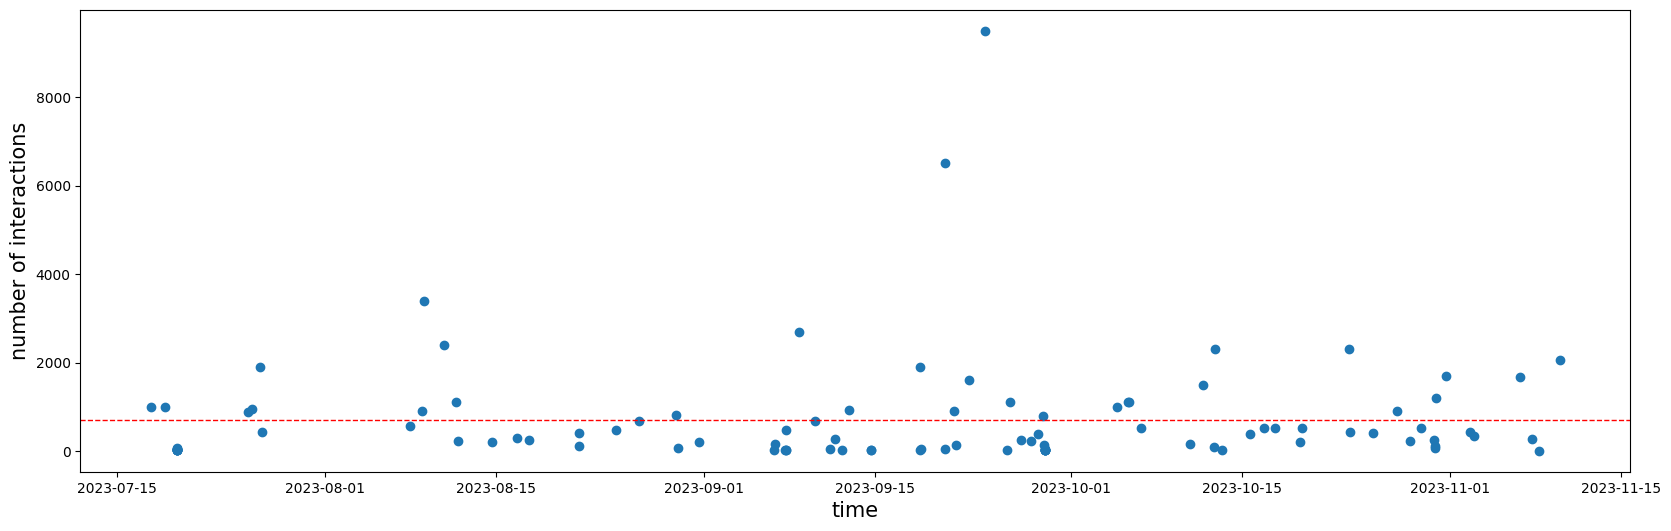

In [61]:
# Biểu đồ thể hiện hiệu xuất react của các bài đăng theo thời gian từ qúa khứ đến hiện tại
check['time'] = pd.to_datetime(check['time'])
x = check['time']
y = check['reaction_count']

plt.figure(figsize = (20,6))
plt.plot_date(x,y)
plt.xlabel("time", fontsize = 15)
plt.ylabel("number of interactions", fontsize = 15)


plt.axhline(y=np.nanmean(y), color = 'red', linestyle = '--', linewidth = 1, label = 'avg')


Như ta có thể thấy trong biểu đồ đường ở trên, fanpage của "Hotwheels" có lượt số tương tác không ổn định theo thời gian, với nhiều những điểm nhọn (spikes) phân bố không đồng đều. Lượng reaction thấp nhất được ghi nhận là 9, và cao nhất là 9500, với điểm nhọn nổi bật xuất hiện trong 2 tuần cuối cùng của tháng 9/2023. Lượng react trung bình trên trục thời gian giới hạn là ~ 707 reacts, được biểu diễn bằng đường nét đứt màu đỏ.

Hơn nữa, ta có thể thấy từ tháng 9/2023, fanpage Hot Wheels đã đăng bài viết với tần suất cao hơn tương ứng với nhiều điểm phân bố dày đặc hơn trong biểu đồ (mỗi chấm là một số lượng reactions, tương ứng với 1 bài viết). Trong mục phân tích bài viết, ta nhận ra 18% là bài viết về Hot Wheels Legends Tour - một sự kiện quy mô rất lớn, kéo dài từ tháng 5 đến giữa tháng 11. Tháng 9 nằm giữa tháng 5 và tháng 11, là thời điểm sự kiện bắt đầu nóng lên, các vòng bình chọn ít dần số ứng viên và người chiến thắng lần lộ diện. Chính vì lí do đó, họ đã đẩy mạnh đăng bài, "mượn gió bẻ măng", vừa để cập nhật cuộc thi, vừa để quảng bá và thu về tương tác.  

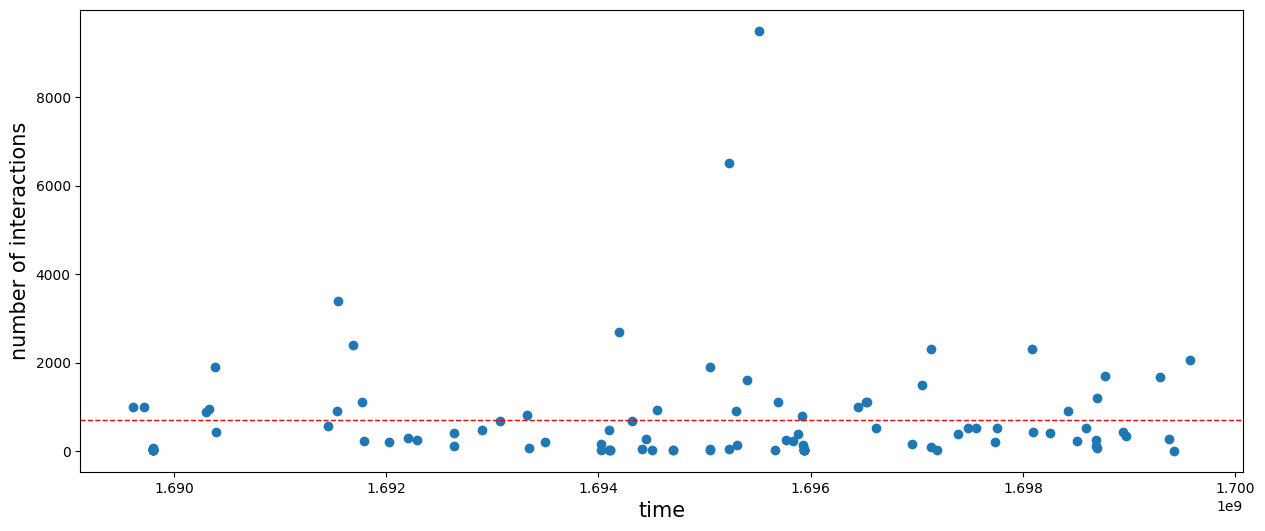

In [36]:
# Biểu đồ phân tán của reactions.
plt.figure(figsize=(15,6))
plt.xlabel("time", fontsize = 15)
plt.ylabel("number of interactions", fontsize = 15)
plt.scatter(dates,y)
plt.axhline(y=np.nanmean(y), color = 'red', linestyle = '--', linewidth = 1, label = 'avg')

Đổi qua biểu đồ phân tán, ta thấy khá nhiều bài viết có số reactions nằm dưới mức bình quân, một số nhỏ hơn bài viết trên trung bình, và ít bài viết xấp xỉ bình quân.

## ==================================================================================================


## So sánh các chỉ số tương tác khác nhau.

In [37]:
compare = raw_df[['post_id', 'post_text', 'time', 'timestamp', 'reaction_count', 'comments', 'shares']].iloc[::-1]
compare

,post_id,post_text,time,timestamp,reaction_count,comments,shares
99,599621192356716,"Meet 'Tootsie', a 1985 Mercedes-Benz 300D, who now reigns as the finalist at the Hot Wheels Legends Tour Houston stop! 🎉\r\n\r\nBuilt for both function and fun, this reimagined classic flaunts bold fender flairs, a custom lifted suspension, and an unmissable exhaust exiting through the hood.\r\n\r\nThis yard ornament transformed into rally royalty was a collaboration of 30+ students and one passionate teacher from Dekaney High School's Automotive Technology Program. After countless hours of hard work, Tootsie’s journey is a testament to ingenuity and teamwork. Congratulations to David Almanzan and his incredible team of students. 🙌💥🏎️",2023-07-17 18:00:08,1689616808,1000,64,94
98,600244618961040,"Join Hot Wheels, NBC, Rutledge Wood and Dalal Elsheikh tonight at 10PM ET on Threads to live-thread all things Hot Wheels: Ultimate Challenge.",2023-07-18 21:36:24,1689716184,1000,74,73
97,300656448999300,NaN,2023-07-19 21:08:47,1689800927,32,22,0
96,998235587977759,NaN,2023-07-19 21:19:33,1689801573,20,15,0
95,130770646693712,NaN,2023-07-19 21:30:06,1689802206,19,5,0
...,...,...,...,...,...,...,...
4,1276112246404579,"Join us for the Semi-Finals of the Hot Wheels Legends Tour! Watch LIVE judging from a panel of celebrities and top motorsport athletes, including Coco Zurita, Aimee Shackelford, and Eric Kendricks\r\nThe Hot Wheels Legends Tour, now in its sixth year, is a global search for the next fan-made custom car to be made into a Hot Wheels die-cast.\r\n\r\nThe Hot Wheels Legends Tour is made possible in partnership with Walmart and Presenting Sponsor, Mobil 1.\r\nLearn more about the Hot Wheels Legends Tour at www.hotwheels.com/legends",2023-11-03 00:00:18,1698969618,335,493,56
3,661756316143203,"This Saturday marks the sixth Hot Wheels Legends Tour Global Finale.\r\n\r\nBefore we crown a new winner, let’s open up the vault and take a look back at all of our previous winners. 🏆",2023-11-06 17:27:08,1699291628,1670,90,212
2,662301126088722,Tune in this Saturday for the Hot Wheels Legends Tour Global Grand Finale and see which car will be chosen to be immortalized into a Hot Wheels 1:64 scale die-cast.\r\n\r\nStreaming live 11.11.2023 at 9am PST on Hot Wheels social channels and MattelCreations.com.,2023-11-07 17:15:04,1699377304,282,58,39
1,662533809398787,"Challengers, let’s race full speed ahead this 11 Nov! ENJOY UP TO 70% OFF with Shopee 11.11 Big Sale & Lazada’s 11.11 Biggest Sale of The Year!\r\n\r\n🗓️ BEST DEALS ONLY on 11.11 🗓️\r\n🤩 UP TO 70% OFF\r\n🤩 Shopee : EXTRA UP TO $26 OFF Voucher*\r\n🤩 Lazada : EXTRA UP TO $22 OFF Voucher*\r\n*T&Cs apply.\r\n\r\n💡🎁GIFT-WITH-PURCHASE AWAITS EACH STORE💡\r\n🧡Shopee: FREE 1x Thomas Storage Box with min. purchase of $60 & above on any products.\r\n💙Lazada: FREE 1x Hot Wheels Limited Edition Drawstring Bag with min. purchase of $40 & above on any products.\r\n\r\n🚗🏎️💨 Shop & build tracks, zoom, flip, stunt, crash… all the way with Hot Wheels City, Monster Trucks, and more!🔥\r\n\r\n🎁Don't miss out, add-to-cart the most exciting 11.11 deals now while stocks last!⏰\r\n\r\nSHOP NOW at\r\n🧡https://bit.ly/MattelStore_ShopeeSG\r\n💙https://bit.ly/MattelStore_LazadaSG\r\n\r\n#ShopeeSG #Shopee1111BigSale #Lazada1111 #LazadaSG #MattelSG",2023-11-08 06:00:47,1699423247,9,0,1


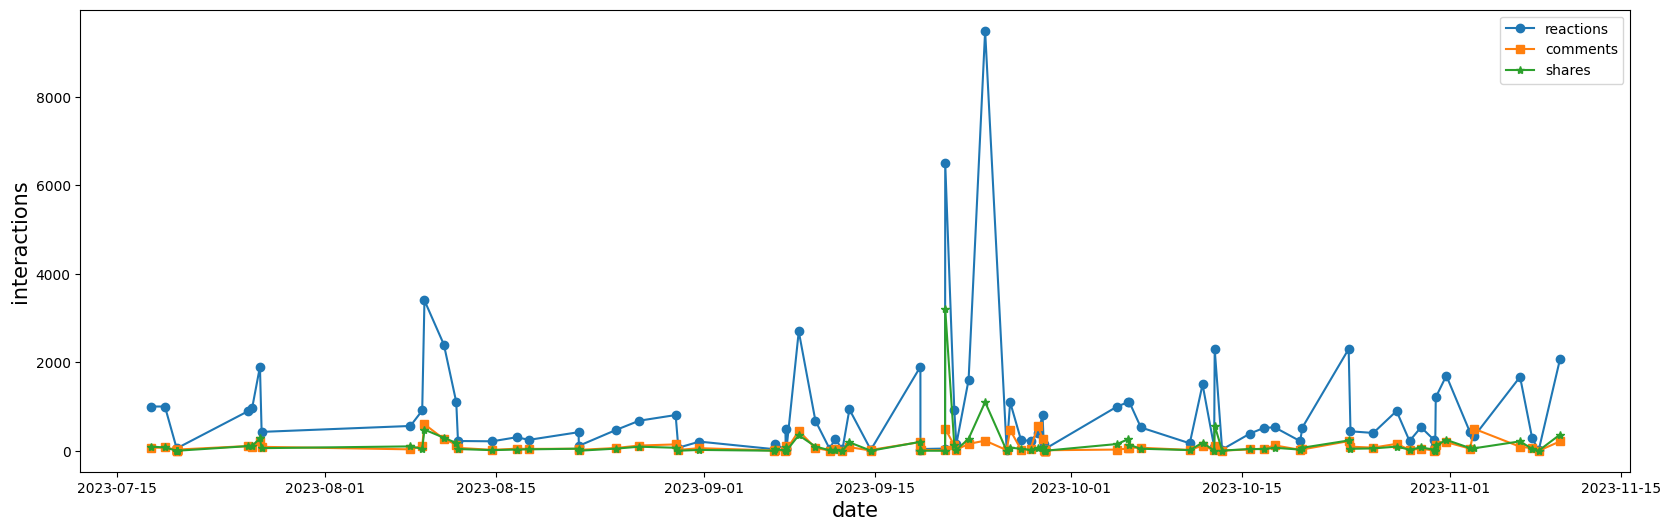

In [54]:
compare['time'] = pd.to_datetime(compare['time'])
dates = compare['time']
x = compare['reaction_count']
y = compare['comments']
z = compare['shares']

plt.figure(figsize = (20,6))
plt.xlabel("date", fontsize = 15)
plt.ylabel("interactions", fontsize = 15)

plt.plot(dates, x, label = "reactions", marker = "o")
plt.plot(dates, y, label = "comments", marker = "s")
plt.plot(dates, z, label = "shares", marker = "*")

plt.legend()

Như biểu đồ ở trên, ta thấy số comments và shares có tỷ lệ 99% thấp hơn số reactions do 2 phương thức tương tác này cần nhiều công sức và thao tác hơn, so với reaction là 1 lần bấm. Nhìn chung, số comments và shares luôn nhỏ hơn 10% số reactions. Khi lướt Facebook, nhiều người dùng có xu hướng lướt nhanh, lướt nhiều (lí do được gọi là "lướt") hơn là ở lại một bài viết và xem xét kỹ càng và chăm chỉ tương tác, nên xu hướng ở trên là hợp lý.

## ==========================================================================================================================